In [1]:
# Importacion de funciones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns

# Cargamos el tema de los graficos
sns.set_theme()

# Cargamos la base de datos de muertes totales incluyendo la gripe
df_total = pd.read_csv('DEFUNCIONES_FUENTE_DEIS_2016_2021_29042021.csv', sep=";", encoding="utf-8", header=None)


# Cargamos la base de datos de muertes por covid obtenida del github de gob.cl
# se transpone el dataframe para dejar los nombres de fila como nombre de las columnas
df_covid = pd.read_csv('TotalesNacionales.csv').transpose()

# Convertimos la primera fila en los nombres de las columnas
df_covid.columns = df_covid.iloc[0]
df_covid = df_covid[1:]['Fallecidos']

# Mensaje
print('Datos cargados:')
print(f' Filas en df_total {len(df_total)}')
print(f' Filas en df_covid {len(df_covid)}')

Datos cargados:
 Filas en df_total 597128
 Filas en df_covid 428


In [2]:
# Revisamos por valores nulos de las muertes en chile
df_total.isnull().sum()

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17    441048
18    555921
19    555921
20    555921
21    555921
22    555921
23    555921
24    555921
25    555921
dtype: int64

<p style="font-size:16px;"> Podemos observar que el dataframe tiene varias columnas nulas, las cuales no afectar al calculo de los datos pero de todas maneras estan seran eliminadas al filtrar los datos</p>

In [3]:
# Ahora revisamos los valores nulos del dataframe de fallecidos por COVID-19
df_covid.isnull().sum()

0

<p style="font-size:16px;"> El dataframe de fallecimientos por covid no presenta ningun valor nulo</p>

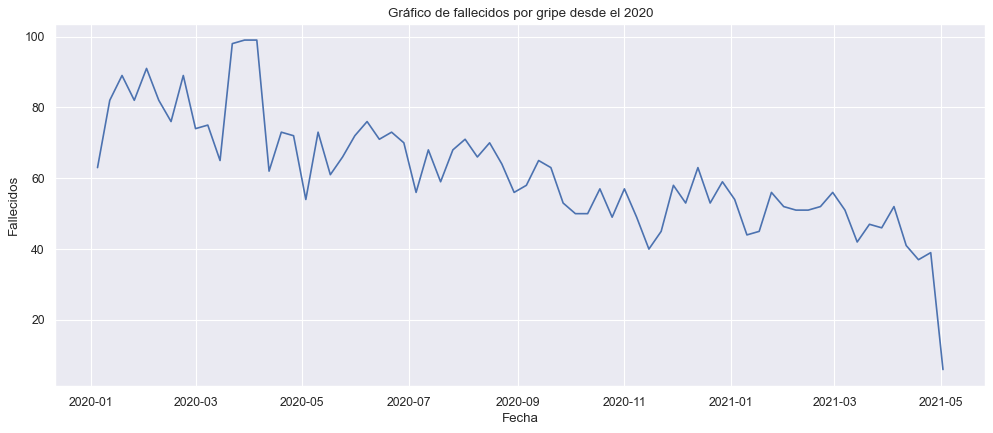

In [4]:
# Filtramos el dataframe por las filas que contengan neuminia en la enfermedad y quitamos todas las columnas no usadas
# o con valores nulos
df_gripe = df_total[df_total[16].str.contains('NEUMONIA')].drop([0,3,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25] ,axis=1)
# Seleccionamos las filas que tienen la palabra NEUMONIA debido a que esta neumonia es causada por gripe agravada 
# Renombramos las columnas
df_gripe.columns = ['Fecha','Sexo','Edad','Enfermedad']

# Contamos las muertes por fecha y se genera un nuevo dataframe
df_gripe = df_gripe.Fecha.value_counts().reset_index()

# Renombramos las columnas
df_gripe.columns = ['Fecha','Fallecidos']

# Transformamos la columna de fechas de string a datetime para poder ordenar el dataframe
df_gripe['Fecha'] = pd.to_datetime(df_gripe['Fecha'], format='%d/%m/%Y')

# Ordenamos el dataframe
df_gripe = df_gripe.sort_values('Fecha')

# Seleccionamos solo la informacion desde el 2020 en adelante
df_gripe = df_gripe.loc[df_gripe['Fecha'] > '2020-01-01']

# Agrupamos la informacion por semana
df_gripe = df_gripe.groupby(pd.Grouper(freq='W', key='Fecha'))['Fallecidos'].sum()
df_gripe = df_gripe.reset_index()

# Graficamos las muertes por gripe
#  Agrandamos el grafico
figure(figsize=(15, 6), dpi=80)

#  Generamos el grafico
grafico = plt.plot(df_gripe['Fecha'], df_gripe['Fallecidos'])

#  Definimos el titulo y los nombres de los ejes
plt.title('Gráfico de fallecidos por gripe desde el 2020')
plt.xlabel('Fecha')
plt.ylabel('Fallecidos')

# Mostramos el grafico
plt.show()

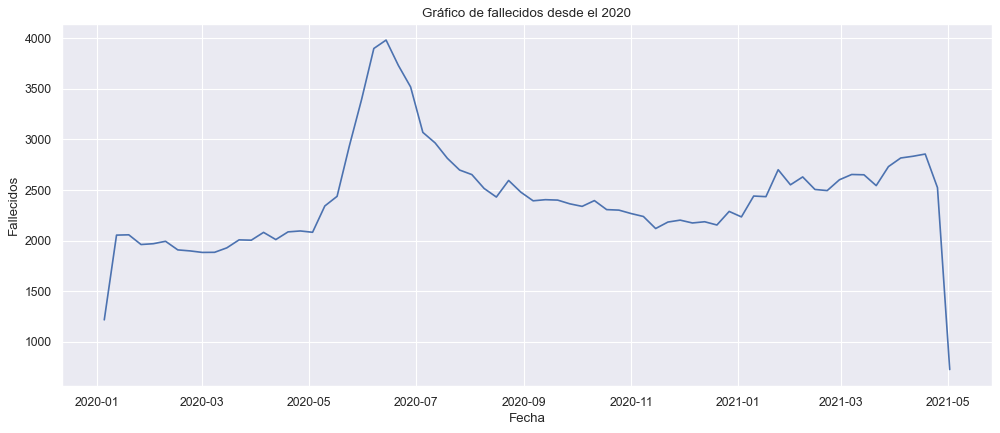

In [5]:
# Quitamos todas las columnas no usadas
df_total_filtrado = df_total.drop([0,3,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25] ,axis=1)

# Renombramos las columnas
df_total_filtrado.columns = ['Fecha','Sexo','Edad','Enfermedad']

# Contamos las muertes por fecha y se genera un nuevo dataframe
df_total_filtrado = df_total_filtrado.Fecha.value_counts().reset_index()

# Renombramos las columnas
df_total_filtrado.columns = ['Fecha','Fallecidos']

# Transformamos la columna de fechas de string a datetime para poder ordenar el dataframe
df_total_filtrado['Fecha'] = pd.to_datetime(df_total_filtrado['Fecha'], format='%d/%m/%Y')

# Ordenamos el dataframe por fecha
df_total_filtrado = df_total_filtrado.sort_values('Fecha')

# Seleccionamos solo la informacion desde el 2020 en adelante
df_total_filtrado = df_total_filtrado.loc[df_total_filtrado['Fecha'] > '2020-01-01']

df_total_filtrado = df_total_filtrado.reset_index()

# Agrupamos la informacion por semana
df_total_filtrado = df_total_filtrado.groupby(pd.Grouper(freq='W', key='Fecha'))['Fallecidos'].sum()
df_total_filtrado = df_total_filtrado.reset_index()

# Graficamos las muertes desde el 2021
#  Agrandamos el grafico
figure(figsize=(15, 6), dpi=80)

#  Generamos el grafico
grafico = plt.plot(df_total_filtrado['Fecha'], df_total_filtrado['Fallecidos'])

#  Definimos el titulo y los nombres de los ejes
plt.title('Gráfico de fallecidos desde el 2020')
plt.xlabel('Fecha')
plt.ylabel('Fallecidos')

# Mostramos el grafico
plt.show()

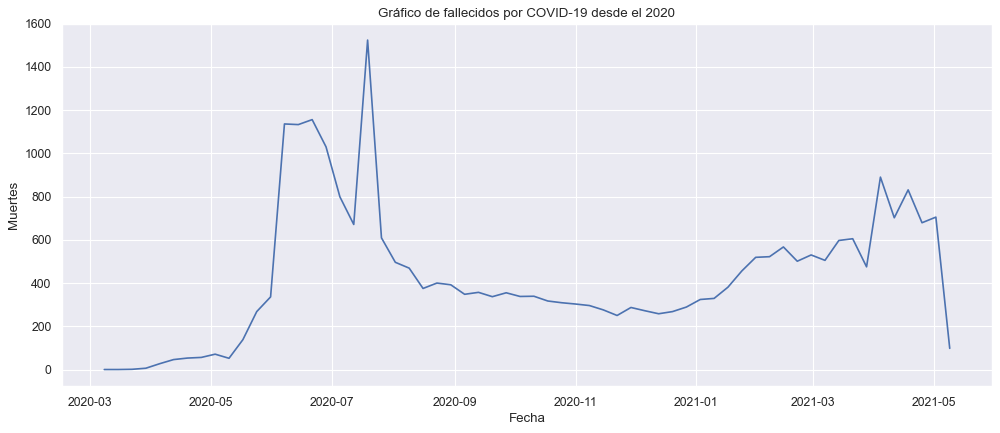

In [6]:
# Como los datos de fallecimientos diarios esta guardada de forma acumulativa debemos 
# transformarla para poder compararla con los graficos anteriores
df_covid_desacumulado = df_covid.reset_index()
valores_desacumulados = []

# Para esto restamos desde el final de los datos calculando los valores diarios no acumulados
for i in range(len(df_covid)-1,-1,-1):
    if i != 0:
        valores_desacumulados.append(df_covid[i]-df_covid[i-1])
    else:
        valores_desacumulados.append(df_covid[i])

# Invertimos la lista para que sea de menor a mayor
valores_desacumulados.reverse()

# Añadimos la columna de valores desacumulados
df_covid_desacumulado['Fallecidos'] = valores_desacumulados

# Renombramos las columnas
df_covid_desacumulado.columns = ['Fecha','Fallecidos']

# Transformamos la columna de fechas de string a datetime para poder ordenar el dataframe
df_covid_desacumulado['Fecha'] = pd.to_datetime(df_covid_desacumulado['Fecha'], format='%Y/%m/%d')

# Ordenamos el dataframe por fecha
df_covid_desacumulado = df_covid_desacumulado.sort_values('Fecha')

# Agrupamos la informacion por semana
# la forma de usar groupby fue sacada de https://pandas.pydata.org/
df_covid_desacumulado = df_covid_desacumulado.groupby(pd.Grouper(freq='W', key='Fecha'))['Fallecidos'].sum()
df_covid_desacumulado = df_covid_desacumulado.reset_index()

# Graficamos las muertes desde el 2021
#  Agrandamos el grafico
figure(figsize=(15, 6), dpi=80)

#  Generamos el grafico
grafico = plt.plot(df_covid_desacumulado['Fecha'], df_covid_desacumulado['Fallecidos'])

#  Definimos el titulo y los nombres de los ejes
plt.title('Gráfico de fallecidos por COVID-19 desde el 2020')
plt.xlabel('Fecha')
plt.ylabel('Muertes')

# Mostramos el grafico
plt.show()

<h4> El alza irregular de defunciones que hubo el día 2021-05-03  se debe a un reajuste de fallecidos mal contados.</h4>

<p style="font-size:15px;">Del gráfico de fallecimientos por COVID-19 y del gráfico de fallecimientos por gripe, podemos ver que la cantidad de fallecidos por COVID-19 supera por mucho la cantidad de fallecidos por gripe dentro del mismo periodo de tiempo, esto se debe a que el COVID-19 es mucho más letal y difícil de tratar. En conclusión el COVID-19 no es como la gripe común debido a que es mucho más contagiosa y letal.</p>